In [6]:
import os
import glob
import pandas as pd 
import numpy as np
#import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
%matplotlib inline
from pingouin import ttest

import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.ndimage import gaussian_filter

In [7]:
#!pip install plotnine
#!pip install pingouin

In [8]:
PVSData_t2star = pd.read_csv(os.path.join("/NAS","dumbo","protocoles","FAIRPARKII","PolyVoxlScore","github","pvs","t2star_results.tsv"),sep=',')
PVSData_t2star.set_index('SUBJ',inplace=True)

In [9]:
GROUP_FILE=os.path.join("/NAS","dumbo","protocoles","FAIRPARKII","Group_FAIRPARK_CORR.xlsx")
GroupData = pd.read_excel(GROUP_FILE,index_col=0,engine='openpyxl')
GroupData.index=GroupData.index.astype(str)

In [10]:
PVSData_t2star['GROUP'] = ""

for SUBJ in PVSData_t2star.index:
    ptID = SUBJ[0] + SUBJ[2:6]
    if ptID in GroupData.index and not np.isnan(GroupData.loc[ptID, 'GROUPE_1_Deferiprone']):
        PVSData_t2star.loc[SUBJ,'GROUP'] = GroupData.loc[ptID, 'GROUPE_1_Deferiprone']

#print(PVSData_t2star)

In [11]:
PVSData_t2star['GROUP'] = PVSData_t2star['GROUP'].replace({1: 'DEF', 2: 'PLA'})
print(PVSData_t2star)

          SES           PVS    PVS_QT GROUP
SUBJ                                       
101001YM  W00 -3.159625e+06  0.522239   PLA
101001YM  W36 -3.141856e+06  0.610768   PLA
101003DM  W00 -3.154302e+06  0.554923   DEF
101003DM  W36 -3.118645e+06  0.766113   DEF
101004NW  W00 -2.969985e+06  2.079254   DEF
...       ...           ...       ...   ...
703010AA  W36 -3.283834e+06 -0.599451   PLA
703011AA  W00 -3.100326e+06  0.942641   DEF
703011AA  W36 -3.141097e+06  0.622163   DEF
703013AA  W00 -3.046330e+06  1.387093   PLA
703013AA  W36 -3.033100e+06  1.522757   PLA

[298 rows x 4 columns]


In [12]:
#PVSData.rename(columns={'VAL': 'PVS_SCORE'}, inplace=True)

/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


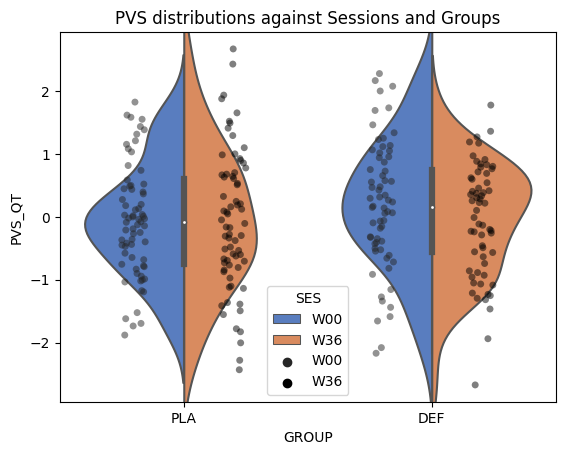

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
# Créer le graphique de violon
sns.violinplot(x="GROUP", y="PVS_QT", hue="SES", data=PVSData_t2star.dropna(), split=True, palette="muted")

# Superposer les points individuels avec stripplot
sns.stripplot(x="GROUP", y="PVS_QT", hue="SES", data=PVSData_t2star.dropna(), color="k", alpha=0.5, dodge=True)

plt.title("PVS distributions against Sessions and Groups")
plt.savefig(os.path.join("/NAS","dumbo","protocoles","FAIRPARKII","PVS_scores_T2starMaps_byGROUP.jpg"))
plt.show()

/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


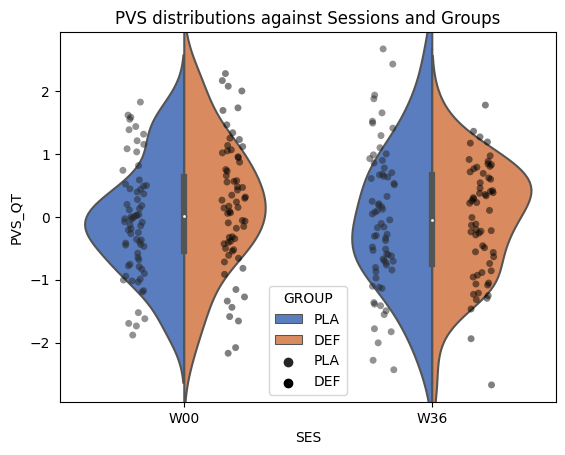

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
# Créer le graphique de violon
sns.violinplot(x="SES", y="PVS_QT", hue="GROUP", data=PVSData_t2star.dropna(), split=True, palette="muted")
# Superposer les points individuels avec stripplot
sns.stripplot(x="SES", y="PVS_QT", hue="GROUP", data=PVSData_t2star.dropna(), color="k", alpha=0.5, dodge=True)
plt.title("PVS distributions against Sessions and Groups")
plt.savefig(os.path.join("/NAS","dumbo","protocoles","FAIRPARKII","PVS_scores_T2starMaps_bySES.jpg"))
plt.show()

*******
DEFERIPRONE GROUP
********
            T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test -0.706   59   two-sided  0.483  [-0.27, 0.13]    0.071  0.179  0.084

For Placebo group, paired T-statistic: -0.706, P-value: 0.483

*******
DEFERIPRONE GROUP
********
            T  dof alternative  p-val         CI95%  cohen-d    BF10  power
T-test  3.384   54   two-sided  0.001  [0.11, 0.41]    0.277  21.267  0.523

For Deferiprone group, paired T-statistic: 3.384, p-value: 0.001



Text(0.5, 0, 'Session')

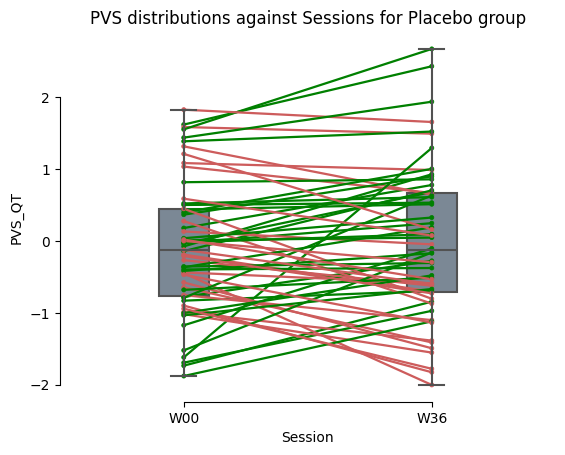

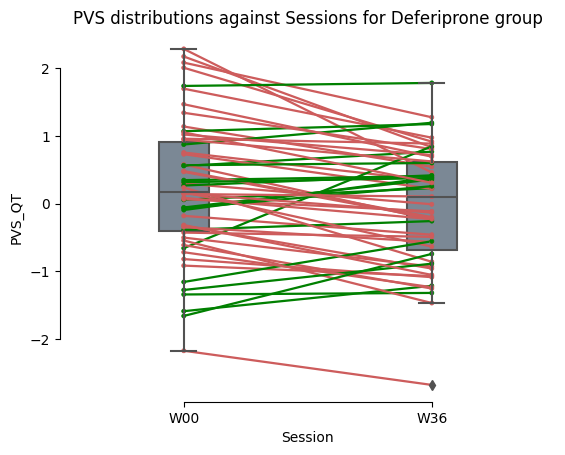

In [21]:
from scipy.stats import ttest_rel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import pingouin as pg

pd.option_context('mode.use_inf_as_na', True)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

set_PLA_W00=set(PVSData_t2star.loc[(PVSData_t2star['GROUP'] == 'PLA') & (PVSData_t2star['SES'] == 'W00')].dropna().index)
set_PLA_W36=set(PVSData_t2star.loc[(PVSData_t2star['GROUP'] == 'PLA') & (PVSData_t2star['SES'] == 'W36')].dropna().index)
set_DEF_W00=set(PVSData_t2star.loc[(PVSData_t2star['GROUP'] == 'DEF') & (PVSData_t2star['SES'] == 'W00')].dropna().index)
set_DEF_W36=set(PVSData_t2star.loc[(PVSData_t2star['GROUP'] == 'DEF') & (PVSData_t2star['SES'] == 'W36')].dropna().index)
intersection_setPLA = set_PLA_W00 & set_PLA_W36
intersection_setDEF = set_DEF_W00 & set_DEF_W36

ses_w00=PVSData_t2star.loc[(PVSData_t2star.index.isin(intersection_setPLA)) & (PVSData_t2star['SES'] == 'W00')]['PVS_QT'].values
ses_w36=PVSData_t2star.loc[(PVSData_t2star.index.isin(intersection_setPLA)) & (PVSData_t2star['SES'] == 'W36')]['PVS_QT'].values

# PLACEBO PAIRED T-TEST
print("*******\nDEFERIPRONE GROUP\n********")
print(ttest(ses_w00, ses_w36,paired=True).round(3))
t_stat, p_value = ttest_rel(ses_w00, ses_w36)
print(f"\nFor Placebo group, paired T-statistic: {np.round(t_stat,3)}, P-value: {np.round(p_value,3)}\n")

ax = pg.plot_paired(data=PVSData_t2star.loc[(PVSData_t2star.index.isin(intersection_setPLA))], dv='PVS_QT', within='SES', subject='SUBJ')
plt.title("PVS distributions against Sessions for Placebo group")
plt.xlabel("Session")

ses_w00=PVSData_t2star.loc[(PVSData_t2star.index.isin(intersection_setDEF)) & (PVSData_t2star['SES'] == 'W00')]['PVS_QT'].values
ses_w36=PVSData_t2star.loc[(PVSData_t2star.index.isin(intersection_setDEF)) & (PVSData_t2star['SES'] == 'W36')]['PVS_QT'].values

# PLACEBO PAIRED T-TEST
print("*******\nDEFERIPRONE GROUP\n********")
print(ttest(ses_w00, ses_w36,paired=True).round(3))
t_stat, p_value = ttest_rel(ses_w00, ses_w36)
print(f"\nFor Deferiprone group, paired T-statistic: {np.round(t_stat,3)}, \033[1mp-value: {np.round(p_value,3)}\033[0m\n")

figure = plt.figure()

ax = pg.plot_paired(data=PVSData_t2star.loc[(PVSData_t2star.index.isin(intersection_setDEF))], dv='PVS_QT', within='SES', subject='SUBJ')
plt.title("PVS distributions against Sessions for Deferiprone group")
plt.xlabel("Session")


In [22]:
!jupyter nbconvert --no-input --to pdf pvs_FP2_robert.ipynb 

[NbConvertApp] Converting notebook pvs_FP2_robert.ipynb to pdf
[NbConvertApp] Support files will be in pvs_FP2_robert_files/
[NbConvertApp] Making directory ./pvs_FP2_robert_files
[NbConvertApp] Making directory ./pvs_FP2_robert_files
[NbConvertApp] Making directory ./pvs_FP2_robert_files
[NbConvertApp] Making directory ./pvs_FP2_robert_files
[NbConvertApp] Writing 24447 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 261970 bytes to pvs_FP2_robert.pdf
